In [1]:
import pandas as pd #librería para manejo de datos

datos= pd.read_csv("https://rtgodwin.com/data/houseprice.csv") #Lee base de datos de web...

In [2]:
datos.columns

Index(['Price', 'Lot.Size', 'Waterfront', 'Age', 'Land.Value', 'New.Construct',
       'Central.Air', 'Fuel.Type', 'Heat.Type', 'Sewer.Type', 'Living.Area',
       'Pct.College', 'Bedrooms', 'Fireplaces', 'Bathrooms', 'Rooms'],
      dtype='object')

In [13]:
import statsmodels.api as sm

y=datos["Price"]
X=datos[['Lot.Size', 'Age', 'Land.Value',   'Living.Area', 'Bedrooms']]

mco = sm.OLS(y, sm.add_constant(X)).fit()
mco.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     546.8
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:33:38   Log-Likelihood:                -21497.
No. Observations:                1728   AIC:                         4.301e+04
Df Residuals:                    1722   BIC:                         4.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.108e+04   6092.721      6.742      0.000    2.91e+04     5.3e+04
Lot.Size     6746.9460   2139.791      3.153      0.002    2550.084    1.09e+04
Age          -261.8782     52.402     -4.998      0.000    -364.656    -159.100
Land.Value      0.9592      0.047     20.442      0.000       0.867       1.051
Living.Area    92.4053      3.578     25.824      0.000      85.387      99.424
Bedrooms    -6496.7342   2454.477     -2.647      0.008   -1.13e+04   -1682.664
==============================================================================
Omnibus:                      606.300   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4322.416
Skew:                           1.458   Prob(JB):                         0.00
Kurtosis:                      10.179   Cond. No.                     2.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.stats.api as sms
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera 4322.415818916057
Chi^2 two-tail prob. 0.0
Skew 1.4578820020429328
Kurtosis 10.178570422652268


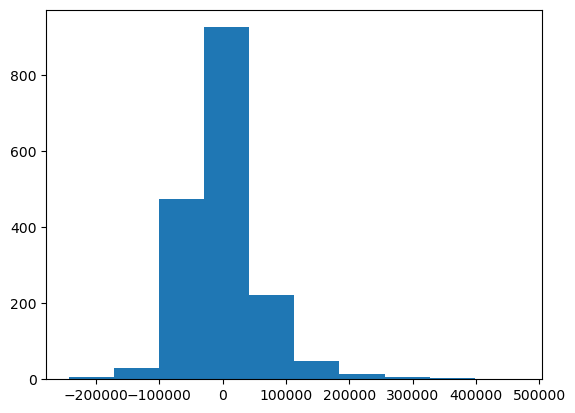

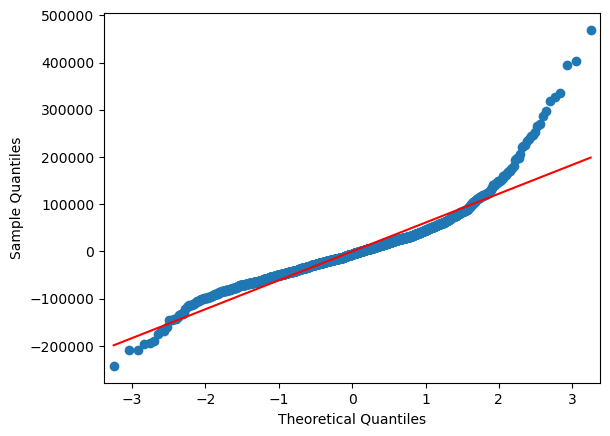

In [24]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
plt.hist(mco.resid)
plt.show()
qqplot(mco.resid, line='s')
plt.show()

In [22]:
diag.kstest_normal(mco.resid)

(0.08871103537632041, 0.0009999999999998899)

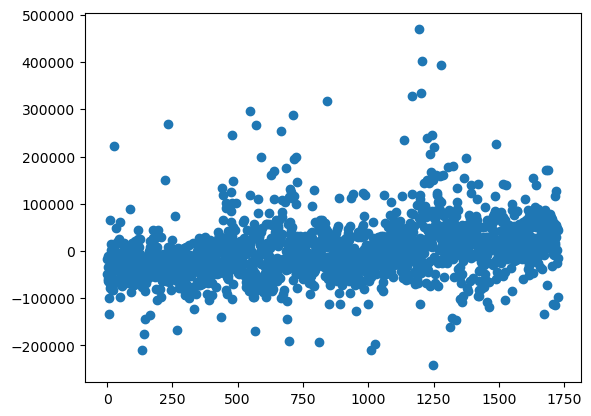

In [28]:
plt.scatter(range(len(y)), mco.resid)
plt.show()